In [1]:
import h5py
import numpy as np
import pandas as pd
from scipy import ndimage
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load data from local file
with h5py.File('3DIMG_18JUN2024_0000_L1C_ASIA_MER_V01R00_B3.h5', 'r') as f:
    print('Available datasets:', list(f.keys()))
    bt_data = np.array(f['TIR1_BT'])[0]

Available datasets: ['GreyCount', 'Projection_Information', 'Sat_Azimuth', 'Sat_Elevation', 'Sun_Azimuth', 'Sun_Elevation', 'TIR1_BT', 'X', 'Y', 'proj_dim', 'time']


In [3]:
# Step 2: Threshold to detect cloud clusters
threshold = 230
clusters, num_clusters = ndimage.label(bt_data < threshold)

In [4]:
# Step 3: Extract features
features = []
for cluster_idx in range(1, num_clusters+1):
    coords = np.argwhere(clusters == cluster_idx)
    if coords.size == 0:
        continue
    tb_values = bt_data[clusters == cluster_idx]
    min_tb_idx = np.argmin(tb_values)
    center = coords[min_tb_idx]
    lat, lon = center[0], center[1]
    pixel_count = len(tb_values)
    mean_tb = np.mean(tb_values)
    min_tb = np.min(tb_values)
    median_tb = np.median(tb_values)
    std_tb = np.std(tb_values)
    center_point = np.array(center)
    distances = np.linalg.norm(coords - center_point, axis=1)
    max_radius = np.max(distances)
    min_radius = np.min(distances)
    mean_radius = np.mean(distances)
    max_height = (250 - min_tb) * 0.1
    mean_height = (250 - mean_tb) * 0.1
    features.append({
        'lat': lat, 'lon': lon, 'pixel_count': pixel_count, 'mean_tb': mean_tb, 'min_tb': min_tb,
        'median_tb': median_tb, 'std_tb': std_tb, 'max_radius': max_radius, 'min_radius': min_radius,
        'mean_radius': mean_radius, 'max_cloud_top_height': max_height, 'mean_cloud_top_height': mean_height
    })

features_df = pd.DataFrame(features)
print(features_df.head())


   lat   lon  pixel_count     mean_tb      min_tb   median_tb    std_tb  \
0    0     0         1616  180.089035  180.089020  180.089020  0.000015   
1    1    47           99  225.914886  217.987152  226.742874  3.046809   
2   13    38            5  228.324539  227.144775  229.111053  0.963276   
3   18  1089            9  225.119873  221.222382  224.687149  2.866469   
4   18  1099           15  226.353195  219.861008  227.543732  2.682077   

    max_radius  min_radius  mean_radius  max_cloud_top_height  \
0  1615.000000         0.0   807.500000              6.991098   
1    13.453624         0.0     5.614427              3.201285   
2     1.414214         0.0     0.965685              2.285522   
3     4.000000         0.0     1.979173              2.877762   
4     4.123106         0.0     1.862816              3.013899   

   mean_cloud_top_height  
0               6.991096  
1               2.408511  
2               2.167546  
3               2.488013  
4               2.36468

In [5]:
# Step 4: Create target and train model
median_size = features_df['pixel_count'].median()
features_df['target'] = (features_df['pixel_count'] > median_size).astype(int)

X = features_df[['pixel_count', 'mean_tb', 'min_tb', 'median_tb', 'std_tb',
                 'max_radius', 'min_radius', 'mean_radius',
                 'max_cloud_top_height', 'mean_cloud_top_height']]
y = features_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Step 5: Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        72

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [8]:
# Step 6: Save model
joblib.dump(model, 'tcc_model.pkl')


['tcc_model.pkl']

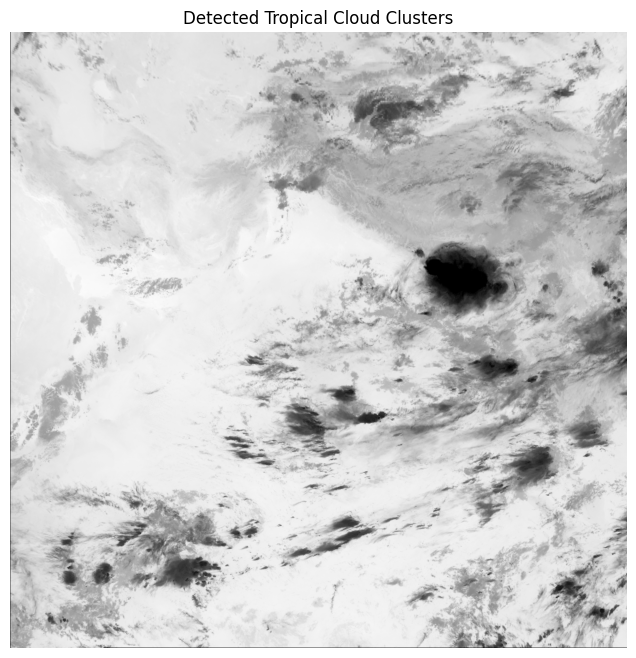

In [9]:
# Step 7: Visualize clusters
plt.figure(figsize=(10, 8))
plt.imshow(bt_data, cmap='gray')
plt.title('Detected Tropical Cloud Clusters')
plt.axis('off')
plt.show()

In [10]:
# Step 8: Save features
features_df.to_csv('tcc_features.csv', index=False)


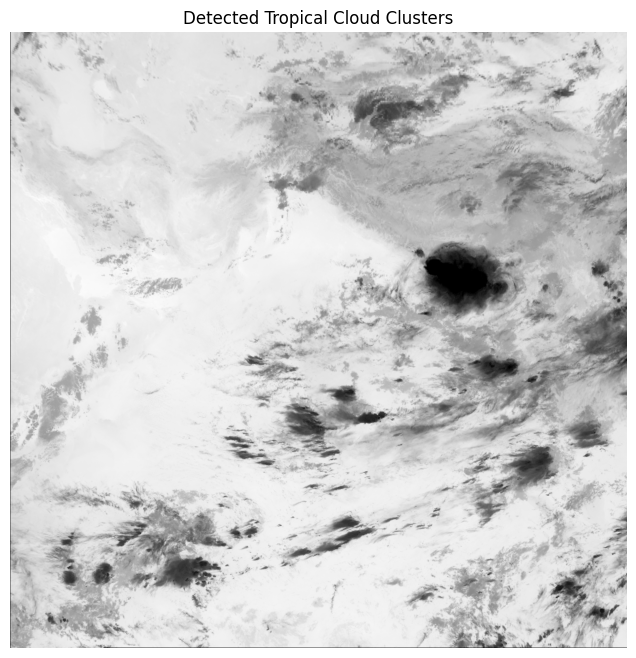

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(bt_data, cmap='gray')
plt.title('Detected Tropical Cloud Clusters')
plt.axis('off')
plt.show()


In [12]:
plt.savefig('tcc_detected_clusters.png')


<Figure size 640x480 with 0 Axes>

In [14]:
import h5py

with h5py.File('3DIMG_18JUN2024_0000_L1C_ASIA_MER_V01R00_B3.h5', 'r') as f:
    print(list(f.keys()))


['GreyCount', 'Projection_Information', 'Sat_Azimuth', 'Sat_Elevation', 'Sun_Azimuth', 'Sun_Elevation', 'TIR1_BT', 'X', 'Y', 'proj_dim', 'time']


In [18]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Open HDF5 file
file_path = '3DIMG_18JUN2024_0000_L1C_ASIA_MER_V01R00_B3.h5'
with h5py.File(file_path, 'r') as f:
    print("📦 File opened successfully!")

    # Step 2: List all datasets/groups
    print("\n✅ List of top-level keys / datasets:")
    for key in f.keys():
        print(f"- {key}")

    # Optional: explore deeper if there are groups inside
    # (In real satellite data, sometimes datasets are nested)
    print("\n🔍 Explore deeper:")
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)

    # Step 3: Read dataset
    # Replace 'TIR1_BT' with the dataset name you actually find
    data = f['TIR1_BT'][0]
    print("\n✅ Dataset shape:", data.shape)
    print("📊 Data type:", data.dtype)
    print("🔢 Sample data (first 5 values):", data.flatten()[:5])



📦 File opened successfully!

✅ List of top-level keys / datasets:
- GreyCount
- Projection_Information
- Sat_Azimuth
- Sat_Elevation
- Sun_Azimuth
- Sun_Elevation
- TIR1_BT
- X
- Y
- proj_dim
- time

🔍 Explore deeper:
GreyCount
Projection_Information
Sat_Azimuth
Sat_Elevation
Sun_Azimuth
Sun_Elevation
TIR1_BT
X
Y
proj_dim
time

✅ Dataset shape: (1616, 1618)
📊 Data type: float32
🔢 Sample data (first 5 values): [180.08902 285.81796 285.81796 285.81796 285.9824 ]


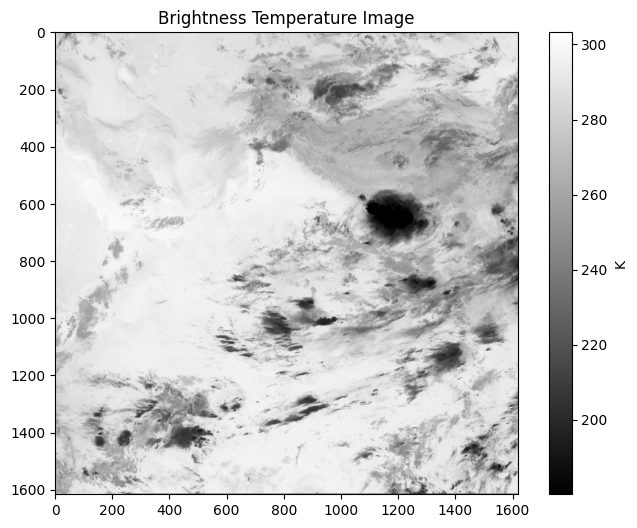

In [19]:
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='gray')  # or try cmap='jet', 'hot', 'cool'
plt.title('Brightness Temperature Image')
plt.colorbar(label='K')
plt.show()


In [20]:
plt.imsave('satellite_image.png', data, cmap='gray')
print("✅ Image saved as satellite_image.png")


✅ Image saved as satellite_image.png


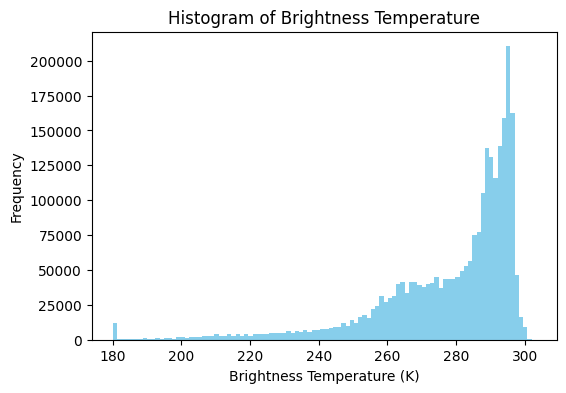

In [21]:
plt.figure(figsize=(6,4))
plt.hist(data.flatten(), bins=100, color='skyblue')
plt.title('Histogram of Brightness Temperature')
plt.xlabel('Brightness Temperature (K)')
plt.ylabel('Frequency')
plt.show()


In [22]:
print("📈 Mean:", np.mean(data))
print("📉 Min:", np.min(data))
print("📈 Max:", np.max(data))
print("📊 Standard Deviation:", np.std(data))


📈 Mean: 278.19138
📉 Min: 180.08902
📈 Max: 303.25717
📊 Standard Deviation: 20.603502


In [23]:
import h5py
import numpy as np

# Open original file
with h5py.File('3DIMG_18JUN2024_0000_L1C_ASIA_MER_V01R00_B3.h5', 'r') as f:
    original_data = f['TIR1_BT'][0]   # adjust dataset name if needed
    print("Original data shape:", original_data.shape)

    # Example: create first test sample (smaller crop)
    test_sample_1 = original_data[:500, :500]  # top-left corner 500x500

    # Example: create second test sample (another crop)
    test_sample_2 = original_data[500:1000, 500:1000]

# Save first test sample as new .h5
with h5py.File('test_sample_1.h5', 'w') as f:
    f.create_dataset('TIR1_BT', data=np.expand_dims(test_sample_1, axis=0))  # keep same shape

# Save second test sample
with h5py.File('test_sample_2.h5', 'w') as f:
    f.create_dataset('TIR1_BT', data=np.expand_dims(test_sample_2, axis=0))

print("✅ Done! Created test_sample_1.h5 and test_sample_2.h5")


Original data shape: (1616, 1618)
✅ Done! Created test_sample_1.h5 and test_sample_2.h5
